In [73]:
import os
import sys

import matplotlib.pyplot as plt
import netron
import torch
import torch.onnx as onnx
from torch.autograd import Variable
from torchvision.models import resnet18
import scienceplots

In [74]:
plt.style.use(['science', 'grid'])

In [31]:
sys.path.append('/Users/crinstaniev/Courses/STATS402/src')

In [33]:
from core.model.encoders.multimodal_encoder import MultimodalEncoder

In [51]:
encoder = MultimodalEncoder(ts_num_features=20)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [70]:
image_sample = torch.randn(32, 3, 224, 224)
text_sample = [
    'This is a sample text to test the MultimodalEncoder module.'
    for _ in range(32)
]  # (batch_size, x)
# (batch_size, timesteps, num_features)
ts_sample = torch.randn(32, 500, 20)

In [87]:
with torch.no_grad():
    output = encoder(ts_sample, image_sample, text_sample)

size: torch.Size([32, 500, 20])


In [88]:
output.shape

torch.Size([32, 6144])

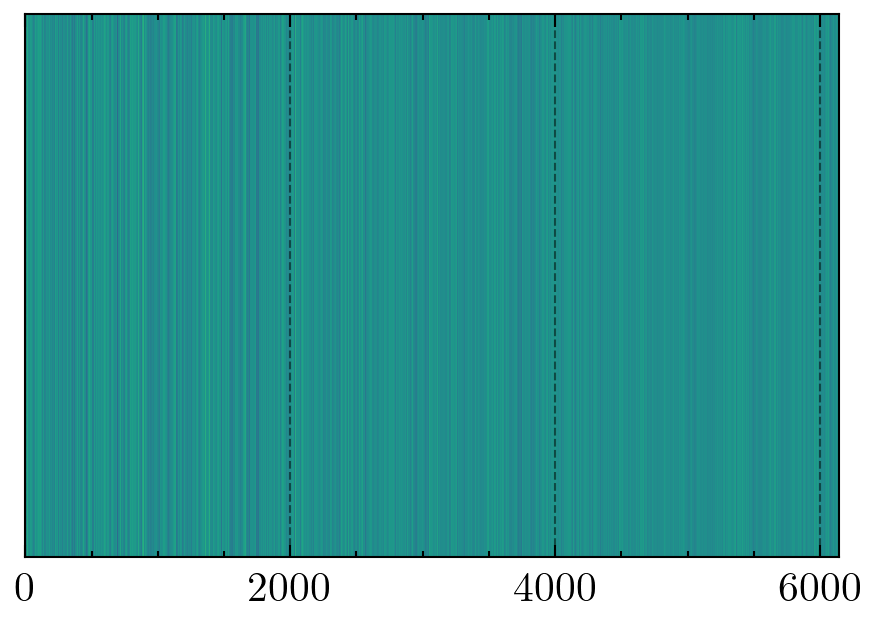

In [101]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(dpi=300)

# Select one signal to visualize
signal = output[0]

plt.imshow([
    output[0].numpy() for _ in range(4096)
    ])

# hide axis labels
plt.yticks([])
plt.show()
